## AutoEncode 노이즈 제거
---
- 데이터 노이즈 제거 활용
- 데이터에서 주요 특징만 추출, 압축하기 때문에 노이즈는 제거됨
- 압축된 주요 특징으로 데이터 복원 > 노이즈 제거

AutoEncoder ( Transfer Learning )
- 노이즈 제거
- 표현(특징) 학습
    - 데이터에서 주요 특징을 찾아 앞축 후 복원하는 학습 모델
- 구성
    - 인코더 : 입력 데이터에서 주요 특징을 추출
    - 디코더 : 주요 특징에서 원 데이터로 복원

In [180]:
import PIL.Image as Image
def pre_img(path):

    # 이미지 불러오기
    test_image=Image.open(path).resize((540,420))
    test_image = test_image.convert('L')
    test_image_arr=np.array(test_image).reshape(420,540,1)/255.0
    
#     # 이미지 그래프로 그리기
#     plt.imshow(test_image)
#     plt.show()

    return test_image_arr

In [181]:
import os 
data_dir = './Noisy_Documents/'
data_names = os.listdir(data_dir+'noisy/')
input_data = np.array([pre_img(data_dir +'noisy/'+name) for name in data_names])
target_data = np.array([pre_img(data_dir +'clean/'+name) for name in data_names])


In [182]:
print(input_data.shape, target_data.shape)

(216, 420, 540, 1) (216, 420, 540, 1)


In [183]:
train_x, test_x, train_y, test_y = train_test_split(input_data, target_data, random_state=493)

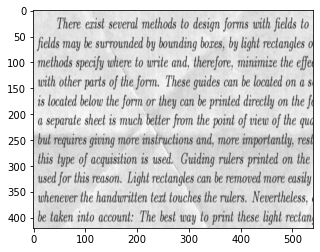

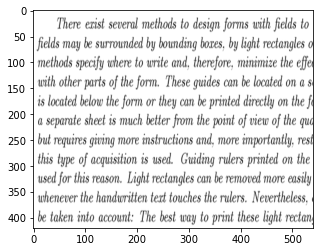

In [184]:

plt.imshow(test_x[0], cmap ='gray')
plt.show()
plt.imshow(test_y[0], cmap ='gray')
plt.show()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 420, 540, 3)       30        
                                                                 
 flatten_25 (Flatten)        (None, 680400)            0         
                                                                 
 dense_53 (Dense)            (None, 100)               68040100  
                                                                 
 dense_54 (Dense)            (None, 226800)            22906800  
                                                                 
 reshape_22 (Reshape)        (None, 420, 540, 1)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 420, 540, 1)       10        
                                                                 
Total params: 90,946,940
Trainable params: 90,946,940

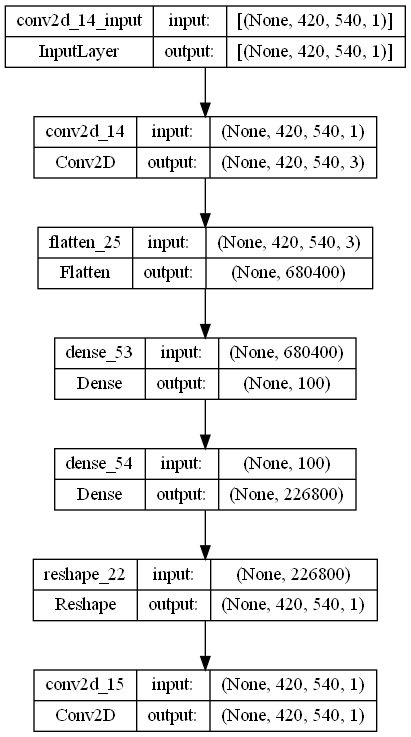

In [199]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
def make_model():
    model = Sequential()
    model.add(Conv2D(filters = 3, kernel_size=3, padding='same', input_shape =(420, 540,1)))

    model.add(Flatten())
    model.add(Dense(
        100,
        activation = 'relu'
   ))
    model.add(Dense(
        420*540,
        activation = 'relu'
   ))
    model.add(Reshape(
        (420, 540,1)
    ))              
    model.add(Conv2D(filters = 1, kernel_size=3, padding='same', activation='sigmoid'))
    
    model.summary()
    
    model.compile(
        optimizer='adam',
        loss = 'mean_squared_error',
        metrics = 'mean_squared_error'
    )
    return model

model = make_model()
plot_model(model,show_shapes=True)

In [200]:
from tensorflow.keras.callbacks import EarlyStopping
es_cb = EarlyStopping(monitor = 'val_loss', patience = 3)
model.fit(train_x, train_x,
         validation_split=0.2,
         epochs = 100,
         callbacks=[es_cb])

Epoch 1/100
5/5 [==============================] - 28s 5s/step - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 2/100
5/5 [==============================] - 23s 4s/step - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 3/100
5/5 [==============================] - 23s 4s/step - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 4/100
5/5 [==============================] - 23s 4s/step - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0823 - val_mean_squared_error: 0.0823
Epoch 5/100
5/5 [==============================] - 23s 4s/step - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 6/100
5/5 [==============================] - 23s 4s/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 7/100
5/5 [=============================

In [201]:
model.evaluate(test_x,test_y)

2/2 [==============================] - 4s 2s/step - loss: 0.0919 - mean_squared_error: 0.0919


[0.09192413091659546, 0.09192413091659546]

In [202]:
pred = model.predict(test_x[[0]])

1/1 [==============================] - 0s 289ms/step


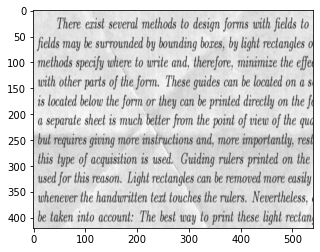

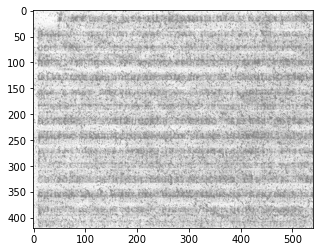

In [203]:

plt.imshow(test_x[0], cmap ='gray')
plt.show()
plt.imshow(pred[0], cmap ='gray')
plt.show()

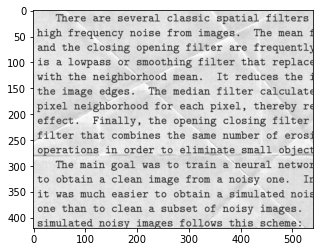

1/1 [==============================] - 0s 127ms/step


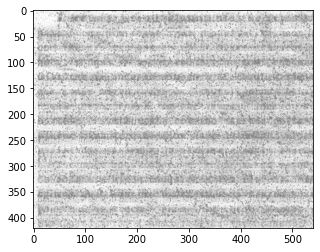

In [204]:

plt.imshow(train_x[0], cmap ='gray')
plt.show()
plt.imshow(model.predict(train_x[[0]])[0], cmap ='gray')
plt.show()

In [205]:
from tensorflow.keras.models import save_model
save_model(model, './hw2_model.h5')